# 주제 : 서울시 공공 자전거 수요 분석

- 자료 출처
    - https://data.seoul.go.kr
    - https://archive.ics.uci.edu
        - https://archive.ics.uci.edu/ml/machine-learning-databases/00560/

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = "C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family =font_name)  #rc : 리모트컨트롤

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"]= False

## 1. Data Definition

In [11]:
bike = pd.read_csv(open("Data/data/SeoulBikeData.csv"))
bike.head(10)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [12]:
bike.info() # Rented Bike Count : 종속변수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

## 2. Quiz

In [13]:
### (1) 시간대별로 평균 몇 대가 대여되었을까?

In [14]:
avg_bike = bike.groupby("Hour")[["Rented Bike Count"]].mean().round(2)
# bike.groupby("Hour").mean()[["Rented Bike Count"]].round(2)
avg_bike

,Rented Bike Count
Hour,
0,541.46
1,426.18
2,301.63
3,203.33
4,132.59
5,139.08
6,287.56
7,606.01
8,1015.70


In [14]:
### (2) 위의 결과를 시각화

Text(18, 1502, '퇴근시간')

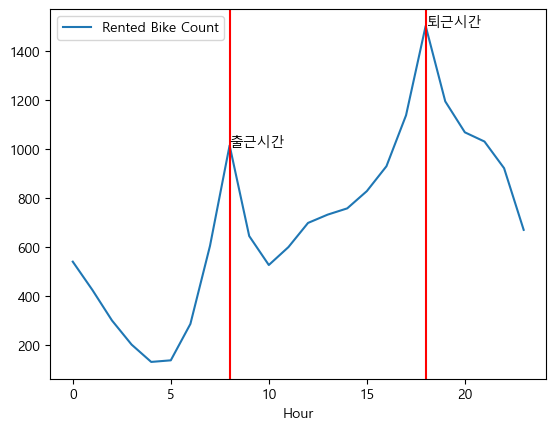

In [29]:
# fig = plt.figure()
# axis = fig.add_subplot()
bike.groupby("Hour").mean()[["Rented Bike Count"]].plot()

plt.axvline(x = 8, color ='r')
plt.axvline(x = 18, color ='r')
plt.text(8, 1015, "출근시간") #plt.text(x좌표, y좌표, 텍스트)
plt.text(18, 1502, "퇴근시간")
# bike_graph = avg_bike.plot(kind = "line")

Object `plt.axvline()` not found.


In [15]:
### (3) 요일별로 평균 몇 대가 대여되었을까?
- 2016/1/1 은 금요일이다
    - 현재 날짜에서 2016년 1월 1을 빼준다
    - 그 날짜의 차이를 7로 나눠준다
    - 나머지가 0이면 금요일

#### 1) 첫번째 방법

In [41]:
bike["weekday1"]=pd.to_datetime(bike["Date"]).dt.weekday
bike.groupby("weekday1").mean()[["Rented Bike Count"]]

weekday_list = ["화", "수", "목", "금", '토', '일', "월"]
bike.head()

C:\Users\acorn\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/12/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\acorn\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/12/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\acorn\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/12/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\acorn\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/12/2017' in DD/MM/YYYY format. Provide format or specif

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,weekday1
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,3
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3


#### 2) 두번째 방법

In [38]:
bike["weekday2"] = pd.to_datetime(bike["Date"], format ="%d/%m/%Y").dt.weekday #날짜 형식 지정
bike.groupby("weekday1").mean()[["Rented Bike Count"]]

,Rented Bike Count
weekday1,
0,719.635833
1,678.362421
2,714.521226
3,743.803686
4,734.449346
5,730.348558
6,615.968364


#### 3) 세번째 방법

In [149]:
# date_diff = pd.to_datetime(bike["Date"], format ="%d/%m/%Y") -\
#             pd.to_datetime('2016-01-01')
# new = date_diff.astype(str).str.split(" ", expand =True)[0].astype(int)
# #expand : 결과 자체를 데이터 프레임으로 나타낸다

# def func_week(x):
#     if x % 7 ==0:
#         return "금요일"
#     elif x%7 ==1:
#         return "토요일"
#     elif x%7 ==2:
#         return "일요일"
#     elif x%7 ==3:
#         return "월요일"
#     elif x%7 ==4:
#         return "화요일"
#     elif x%7 ==5:
#         return "수요일"
#     elif x%7 ==6:
#         return "목요일"

# bike["weekday2"] = new.apply(func_week)
# bike
week_list = {0 : "금", 1:'토', 2:'일', 3:'월', 4:'화', 5:'수', 6:'목'}
bike['weekday3'] = new.apply(lambda x: x%7==week_list.value()
bike

SyntaxError: invalid syntax (2457655356.py, line 26)

In [82]:
bike["weekday4"]=(((pd.to_datetime(bike["Date"], format ="%d/%m/%Y") -\
   pd.to_datetime('2016-01-01')).dt.days)%7).map({0:"금요일", 1 : "토요일",
                                                  2 : "일요일",
                                                  3 : "월요일",
                                                  4 : "화요일",
                                                  5 : "수요일",
                                                  6 : "목요일"})
bike.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,weekday1,weekday2,weekday3,weekday4
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,금요일,0,금요일
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,금요일,0,금요일
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,3,금요일,0,금요일
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,금요일,0,금요일
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,금요일,0,금요일


In [59]:
import datetime

In [70]:
strDate = "2016-01-01"
d = datetime.datetime.strptime(strDate,"%Y-%m-%d")
strDate2 = "2017-12-01"
d2 = datetime.datetime.strptime(strDate2, "%Y-%m-%d")
# print(d)
print((d2-d)/7)
# 2017 12 01 금요일

100 days, 0:00:00


In [9]:
cnt = 0
for cnt in range(8761):
    bike["week_bike"] = cnt
    cnt += 1

bike

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,week_bike
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,8760
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,8760
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,8760
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,8760
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,8760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,8760
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,8760
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,8760
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,8760


In [16]:
### (4) 위의 결과를 시각화 

<AxesSubplot:xlabel='weekday2', ylabel='Rented Bike Count'>

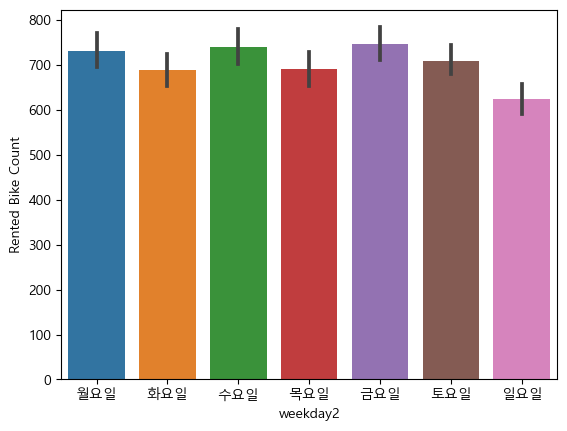

In [95]:
# bike.groupby('weekday2').mean()[["Rented Bike Count"]].plot(kind = 'bar')
sns.barplot(x = 'weekday2', y = 'Rented Bike Count', data = bike,
           order = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일'])

In [17]:
### (5) 요일별, 시간대별로 동시에 시각화

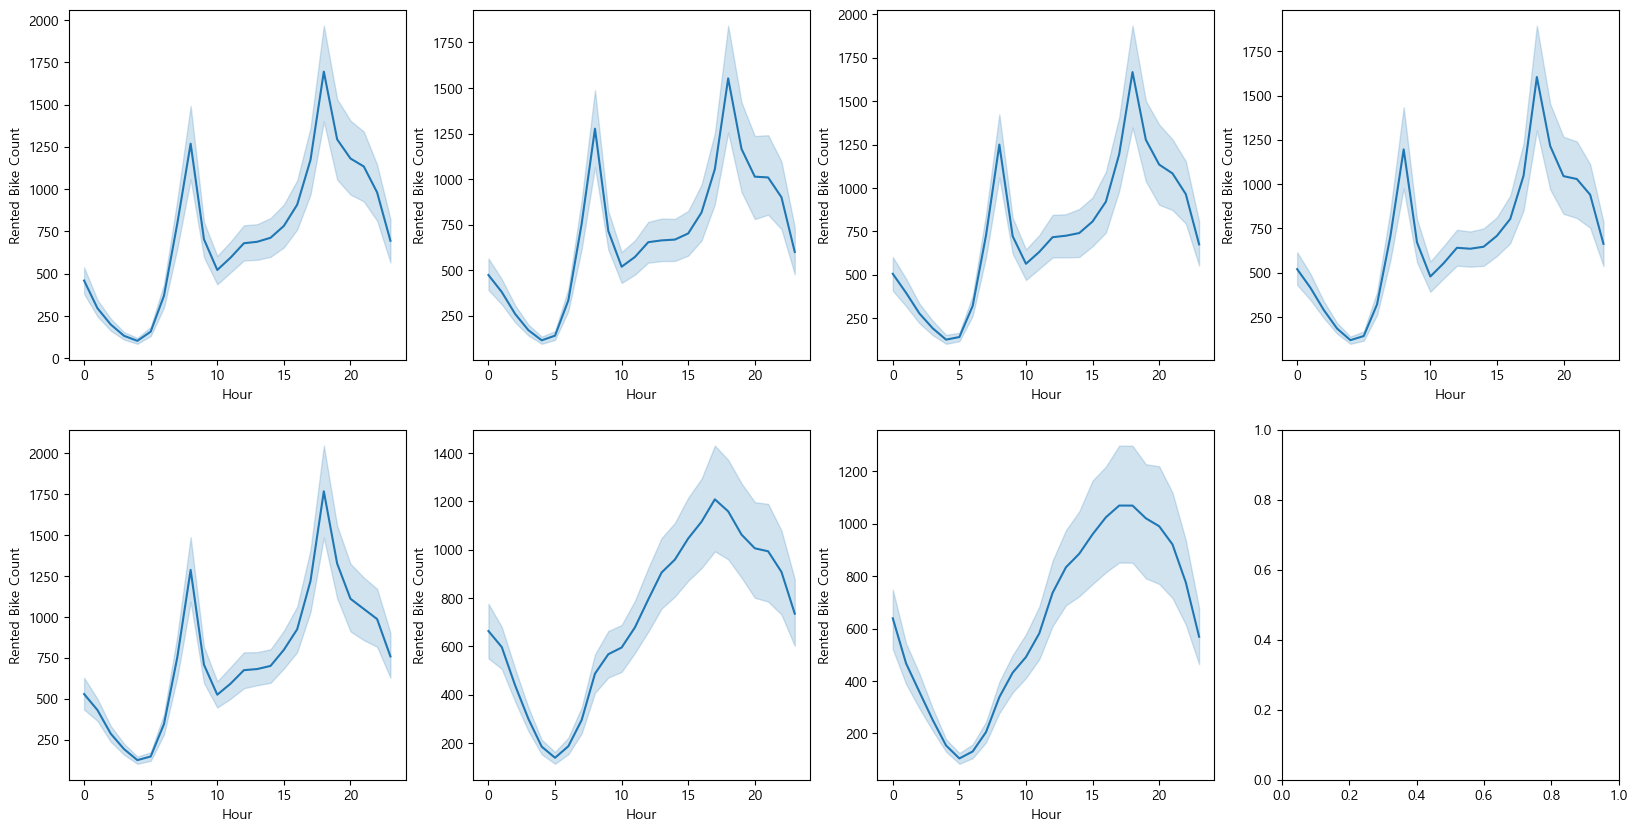

In [123]:
_, ax = plt.subplots(2, 4, figsize =(20, 10))
week_list = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
for i in range(7):
    
    sns.lineplot(x= 'Hour', y='Rented Bike Count', data = bike.loc[bike['weekday2']==week_list[i]], ax = ax[i//4, i%4])
    # ax[행, 열]

In [18]:
### (6) 가장 많이 대여된 계절은?? 봄, 여름 

In [129]:
season_bike = bike.groupby("Seasons")[["Rented Bike Count"]].mean()
season_bike
bike.groupby("Seasons").mean()[["Rented Bike Count"]]

,Rented Bike Count
Seasons,
Autumn,819.597985
Spring,730.031250
Summer,1034.073370
Winter,225.541204


In [19]:
### (7) 온도와 대여횟수는 관계가 있는가??(시각화로 확인할 수 있게)

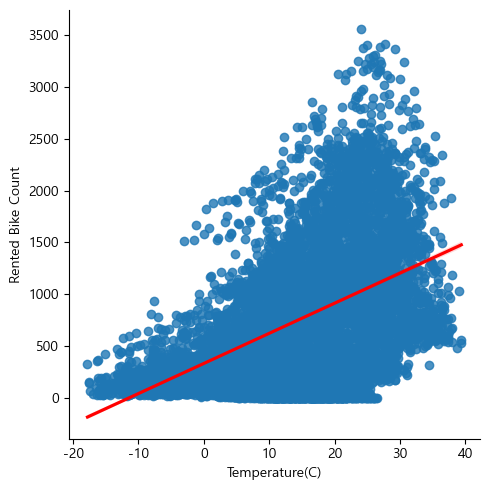

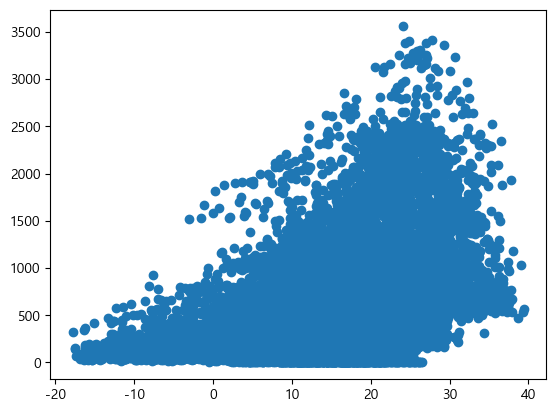

In [137]:
sns.lmplot(x = "Temperature(C)", y = "Rented Bike Count", data=bike, line_kws ={"color" : "red"})
plt.show()

# sns.regplot(x = 'Temperature(C)', y = 'Rented Bike Count', data = bike, fit_reg =False)

# sns.scatterplot(x = "Temperature(C)", y = "Rented Bike Count", data = bike, s= 10)
plt.scatter(x = "Temperature(C)", y = "Rented Bike Count", data = bike)